# Wordcloud from PDF file

In this notebook I create a wordcloud I use as part of a gig image for [my first published gig in Fiverr](https://www.fiverr.com/share/XDe00D). I create the wordcloud from text in a PDF file. The implementation relies on work from my colleague [Juan Fernando Varela](https://github.com/JFVJ/Lemmatization-in-Spanish-Wordcloud-) and the blog entry [Word Cloud in 3 Basic Steps with Python](https://gustavorsantos.medium.com/word-cloud-in-3-basic-steps-with-pythonb-c5a97537b9d6).

In [1]:
import string
import textract
import nltk
nltk.download("stopwords")
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jacasta2/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1. Load and clean data

I transcribed the [Wikipedia entry for data science](https://en.wikipedia.org/wiki/Data_science) in a Word File and then converted it to PDF.

In [2]:
### Load PDF file

text = textract.process("text/Wikipedia_DataScience.pdf").decode("utf-8")

In [3]:
### Transform all the words to lowercase

text = text.lower()

In [4]:
# Remove punctuation
    # https://www.w3schools.com/python/ref_string_maketrans.asp

mytable = str.maketrans("", "", string.punctuation)
text = text.translate(mytable)

## 2. Prepare data

We use the `nlkt` tokenizer to transform each word in a single token. We then remove the stopwords (words that don’t carry any real meaning such as the, and, or, it, etc.).

In [5]:
### Load stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))

### Tokenize text
tokens = word_tokenize(text)

### Remove stopwords
text_clean = [word for word in tokens if word not in stopwords]

## 3. Generate the wordcloud

We re-join the now clean list of tokens into a single text and generate the cloud.

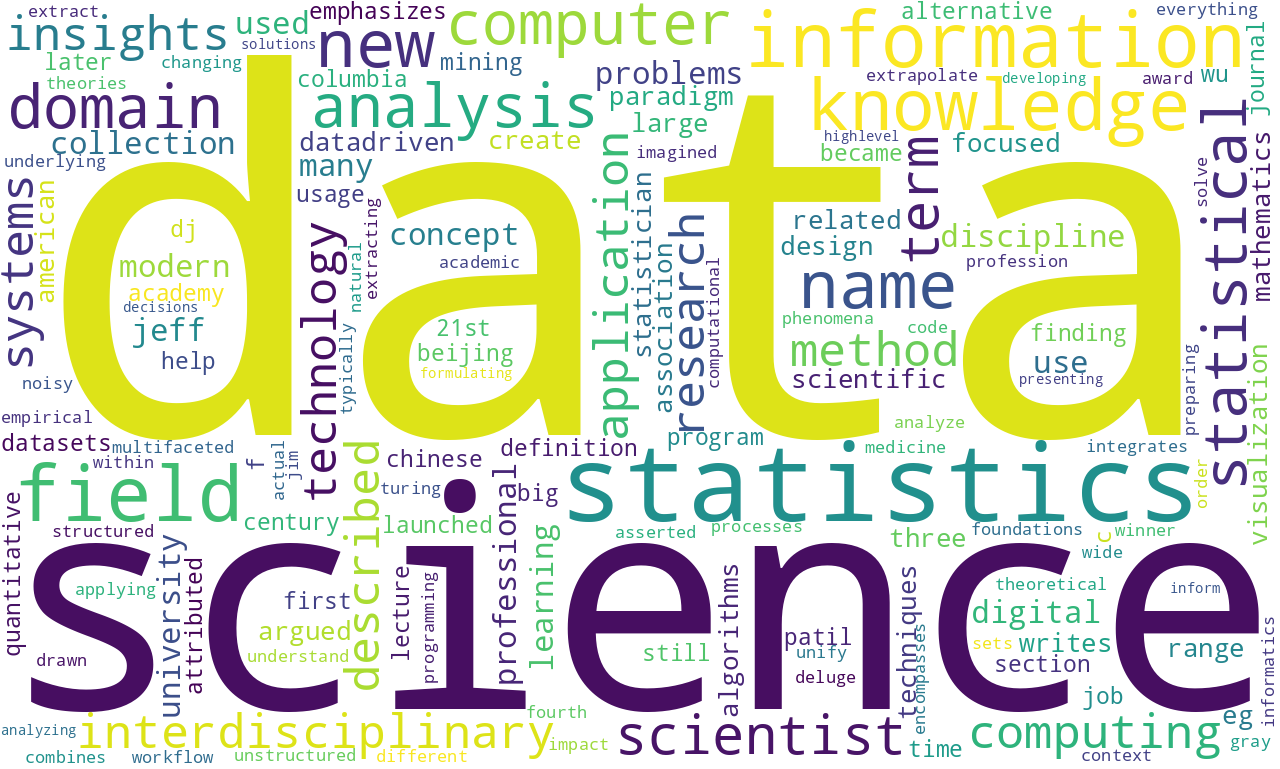

In [6]:
### Generate the text
text = ' '.join(text_clean)

### Create a WordCloud object
wordcloud = WordCloud(background_color = "white", max_words = 150, contour_width = 3, contour_color = "steelblue", \
    width = 1280, height = 769, scale = 1, max_font_size = 500, collocations = False)

### Generate a wordcloud
wordcloud.generate(text)

### Save the wordcloud
#wordcloud.to_image().save("datascience_wordcloud.png")

### Visualize the wordcloud
wordcloud.to_image()

Some relevant parameters of the `WordCloud` object are:

- `background_color = "white"` is the background color.
- `max_words = 150` is the maximum number of words you want to appear in the wordcloud.
- `contour_width = 3` is the size of the contour around the words, so they don’t overlay each other.
- `width = 1280` is the width of the figure.
- `height = 769` is the height of the figure.
- `max_font_size = 500` is the font size of the biggest word.
- `collocations = False` avoids word repetition in the wordcloud.

See the `wordcloud.WordCloud` documentation [here](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html).